In [2]:
    from xlearn22.cluster import KMeans
    import xarray as xr
    import matplotlib.pyplot as plt
    import numpy as np   
    from mpl_toolkits.basemap import Basemap 

-------- clustering... fit2... ------------------
dimensi input_tranfose= (2800, 12)
dimensi input_valid= (2800, 12)
X_valid.shape[0] 2800
X_valid.shape[1] 12
fit dari sklearn cluster KMeans
dimensi hasil_kmeans= (2800, 12)
[KMeans for xarray]: algorithm="lloyd", copy_x=True, init="k-means++", max_iter=300, n_clusters=3, n_init=10, random_state=0, tol=0.0001, verbose=0.
cluster_centers.shape (2800, 1)
dimensi hasil_final= (2800, 12)


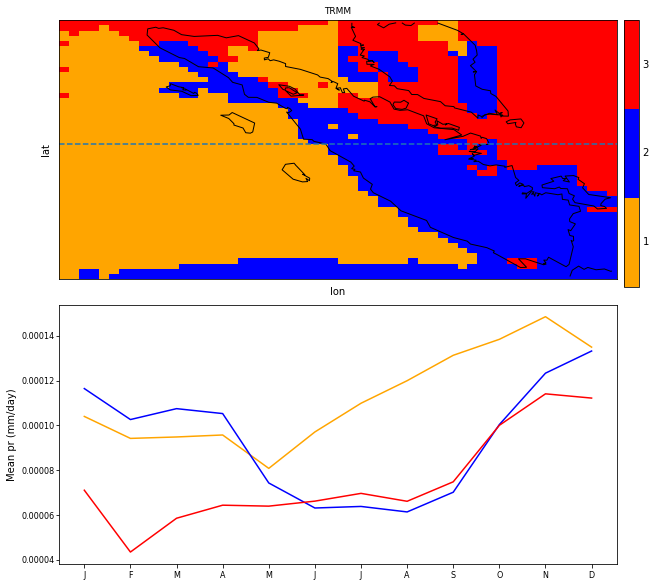

In [3]:
    #choose
    n_clusters=3
    annual_cycle=True
    with_pca=False #default n=3 
    
    fig, ax = plt.subplots(2,1, figsize=(10,10))
    model_names=['TRMM']
    for i in np.arange(1):
        dsi = xr.open_dataset('D:/data1/pr_TRMM-L3_v7-7A_199801-201312.nc')
   
        dsi = dsi.where(
                    (dsi.lat > -6.5) & (dsi.lat < 6) & 
                    (dsi.lon> 93) & (dsi.lon < 107), drop=True)
        ds=dsi.pr
        lat_min = ds.lat.min()
        lat_max = ds.lat.max()
        lon_min = ds.lon.min()
        lon_max = ds.lon.max()
        x,y = np.meshgrid(ds.lon, ds.lat)
        
        m = Basemap(ax=ax[0], projection ='cyl', 
                llcrnrlat = lat_min, #+1*0.22, 
                urcrnrlat = lat_max, #-6*0.22,
                llcrnrlon = lon_min, #+4*0.22, 
                urcrnrlon = lon_max, #-3*0.22, 
                resolution = 'l', fix_aspect=False)
        m.drawcoastlines(linewidth=1)
        m.drawcountries(linewidth=1)
        m.drawstates(linewidth=0.5, color='w')
        
        ds= ds.stack(z=("lat", "lon")) #s= s.unstack()
        
        if annual_cycle:
            dm = ds.groupby('time.month').mean()
           
            fn = 'annual_cycle'
        else:
            fn = 'raw_monthly'
            dm = ds
       
        m = KMeans(n_clusters=n_clusters, random_state=0).fit2(dm, annual_cycle, with_pca)
         
        p=m.cluster_centers_da.sel(cluster=0).plot(ax=ax[0], 
          levels=np.arange(n_clusters+1),
          #cmap='rainbow',
          colors=['orange','blue','red','pink','green', 'violet'],
          add_colorbar = False)
        ax[0].set_title(model_names[i], fontsize=9)
      
        x_tick=['J','F','M','A','M','J','J','A','S','O','N','D']
        x=np.arange(m.cluster_centers_.shape[1])
        
        c=['orange','blue','red', 'pink','green', 'violet']
      
        for ii in range (m.n_clusters):
            ax[1].plot(x, m.cluster_centers_[ii], color=c[ii]) 
        
        ax[1].set_xticks(x)
        ax[1].set_ylabel('Mean pr (mm/day)')
        ax[1].tick_params(axis='y', pad=1,labelsize=8)
   
    ax[0].axhline(0, ls='--')
    
    plt.subplots_adjust(hspace=.1,wspace=.05)
    
    cax = fig.add_axes([0.91, 0.51, 0.02, 0.37])
    
    cbar = plt.colorbar(p,cax=cax)

    cbar.ax.get_yaxis().set_ticks([])

    for j in range(1, n_clusters+1, 1):
        cbar.ax.text(1.5, (j-1+.5), j, ha='center', va='center', color='black')
    cbar.ax.get_yaxis().labelpad = 15
 
    plt.show()

-------- clustering... fit2... ------------------
dimensi input_tranfose= (2800, 12)
dimensi input_valid= (2800, 12)
X_valid.shape[0] 2800
X_valid.shape[1] 12
fit dari sklearn cluster KMeans
dimensi hasil_kmeans= (2800, 12)
[KMeans for xarray]: algorithm="lloyd", copy_x=True, init="k-means++", max_iter=300, n_clusters=3, n_init=10, random_state=0, tol=0.0001, verbose=0.
cluster_centers.shape (2800, 1)
dimensi hasil_final= (2800, 12)


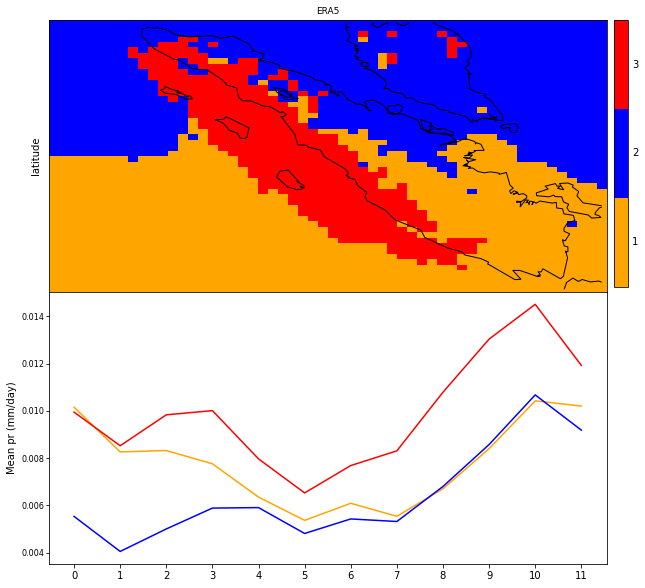

In [5]:
    #ERA5
    n_clusters=3
    annual_cycle=True
    with_pca=False #default n=3 
    
    fig, ax = plt.subplots(2,1, figsize=(10,10))
    model_names=['ERA5']
    for i in np.arange(1):
        
        dsi = dsi = xr.open_dataset('D:/data1/pr_era5_sea_1976-2005.nc')
        dsi = dsi.where(
                    (dsi.latitude > -6.5) & (dsi.latitude < 6) & 
                    (dsi.longitude > 93) & (dsi.longitude < 107), drop=True)
        ds=dsi.tp
        lat_min = ds.latitude.min()
        lat_max = ds.latitude.max()
        lon_min = ds.longitude.min()
        lon_max = ds.longitude.max()
        x,y = np.meshgrid(ds.longitude, ds.latitude)
        
        m = Basemap(ax=ax[0], projection ='cyl', 
                llcrnrlat = lat_min, #+1*0.22, 
                urcrnrlat = lat_max, #-6*0.22,
                llcrnrlon = lon_min, #+4*0.22, 
                urcrnrlon = lon_max, #-3*0.22, 
                resolution = 'l', fix_aspect=False)
        m.drawcoastlines(linewidth=1)
        m.drawcountries(linewidth=1)
        m.drawstates(linewidth=0.5, color='w')
        
        ds= ds.stack(z=("latitude", "longitude")) #s= s.unstack()
        
        if annual_cycle:
            dm = ds.groupby('time.month').mean()
           
            fn='annual_cycle'
        else:
            
            fn='raw_monthly'
            dm=ds
       
        m = KMeans(n_clusters=n_clusters, random_state=0).fit2(dm, annual_cycle, with_pca)
         
        p=m.cluster_centers_da.sel(cluster=0).plot(ax=ax[0], 
          levels=np.arange(n_clusters+1),
          #cmap='rainbow',
          colors=['orange','blue','red','pink','green'],
          add_colorbar = False)
        ax[0].set_title(model_names[i], fontsize=9)

        x_tick=['J','F','M','A','M','J','J','A','S','O','N','D']
        x=np.arange(m.cluster_centers_.shape[1])
        c=['orange','blue','red', 'pink','green']
        for ii in range (m.n_clusters):
            
            ax[1].plot(x, m.cluster_centers_[ii], color=c[ii])
        ax[1].set_xticks(x)
        ax[1].set_ylabel('Mean pr (mm/day)')
        ax[1].tick_params(axis='y', pad=1,labelsize=8)
        
    plt.subplots_adjust(hspace=.0,wspace=.05)
    
    cax = fig.add_axes([0.91, 0.51, 0.02, 0.37])
   
    cbar = plt.colorbar(p,cax=cax)

    cbar.ax.get_yaxis().set_ticks([])

    for j in range(1, n_clusters+1, 1):
        cbar.ax.text(1.5, (j-1+.5), j, ha='center', va='center', color='black')
    cbar.ax.get_yaxis().labelpad = 15
 
    plt.show()